# Reinforcement Learning

# 2. Dynamic programming

This notebook presents policy iteration and value iteration for finding the optimal policy.

Note that these techniques require the enumeration of all states and thus apply to a few models only (e.g., walk, maze, Tic-Tac-Toe, Nim).

In [1]:
import numpy as np

from model import Walk, Maze, TicTacToe, Nim
from agent import Agent

## Walk

In [2]:
wind = {(0, 1): 0.1, (1, 0): 0.2}
Walk.set_parameters(Walk.Size, Walk.Rewards, wind)

walk = Walk()
states = walk.get_all_states()
len(states)

25

## Maze

In [3]:
maze_map = np.load('maze.npy')

maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

states = maze.get_all_states()

len(states)

105

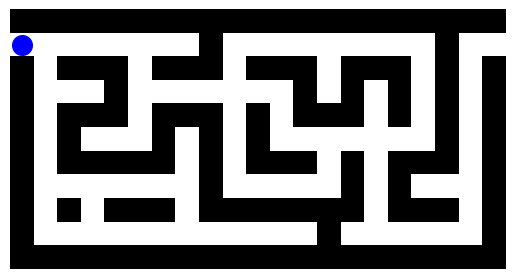

In [4]:
maze.display()

## Policy Iteration

In policy iteration, you start from an arbitrary policy and improve it sequentially from its value function. The limiting policy is optimal.

In [5]:
from dynamic import PolicyEvaluation, PolicyIteration

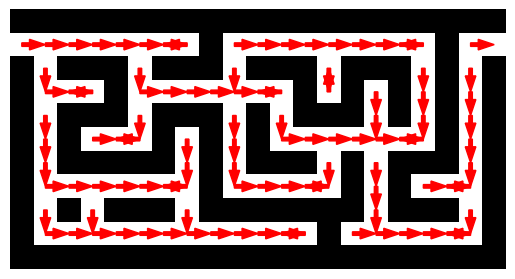

In [6]:
# let's start with the random policy
agent = Agent(maze)
policy = agent.policy

# Display random policy
maze.display_policy(policy)

In [7]:
# policy evaluation
algo = PolicyEvaluation(maze, policy)
algo.evaluate_policy()
values = algo.values

len(values)

105

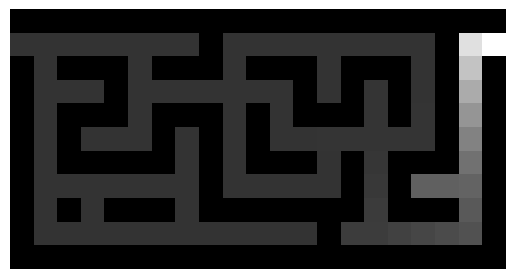

In [8]:
maze.display_values(values)

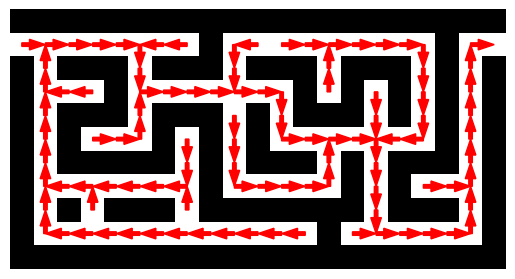

In [9]:
# policy improvement
new_policy = algo.get_policy()

maze.display_policy(new_policy)

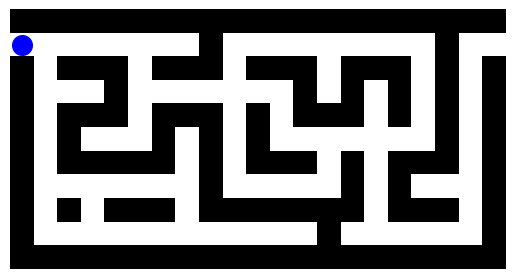

In [10]:
# let's test this new policy
agent = Agent(maze, new_policy)
stop, states, rewards = agent.get_episode()

animation = maze.display(states)
animation

In general, several iterations of policy evaluation / policy improvement are necessary. 

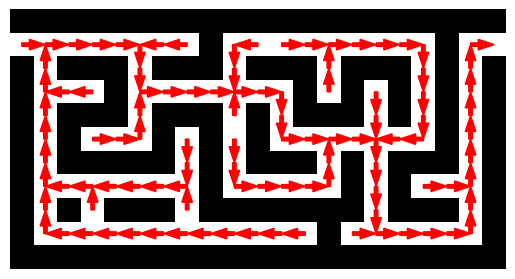

In [11]:
algo = PolicyIteration(maze)

policy = algo.get_optimal_policy()
maze.display_policy(policy)

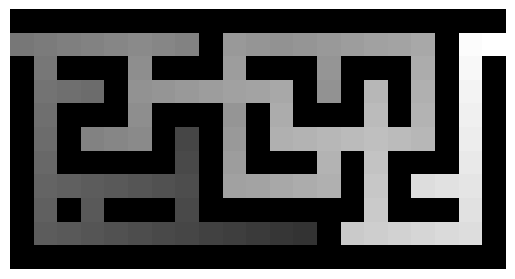

In [12]:
values = algo.values
maze.display_values(values)

## To do

Consider the Walk environment with a discount factor $\gamma = 0.9$.
* What is the expected gain of a random walk?
* Compare with the expected gain of the optimal policy, obtained by Policy Iteration.
* Display the optimal value function and the optimal policy. Interpret the results.
* Increase the strength of the wind and observe the new results.

In [13]:
walk = Walk()

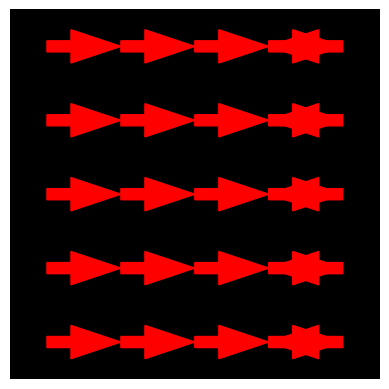

In [14]:
# Displaying random policy
agent = Agent(walk)
walk.display_policy(agent.policy)

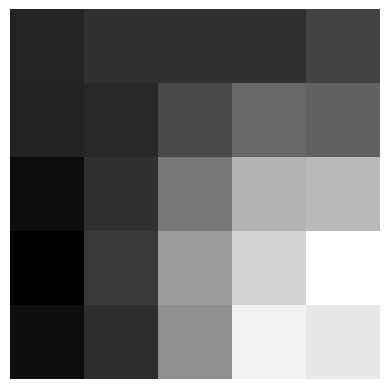

In [15]:
# Displaying values for random policy
algo = PolicyEvaluation(walk, agent.policy)
algo.evaluate_policy()
values = algo.values
walk.display_values(values)

In [16]:
# Gains of random policy
gamma = 0.9
gains = agent.get_gains(gamma=gamma)
print("Expected gain of random policy:", np.mean(gains))

Expected gain of random policy: 1.0791507513632532


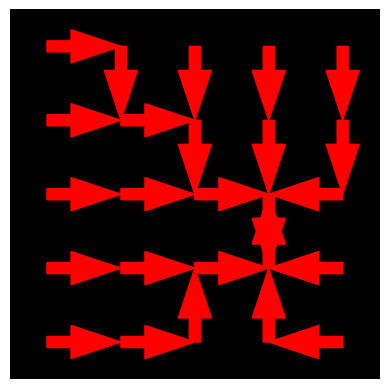

In [17]:
# Displaying optimal policy
algo = PolicyIteration(walk)
optimal_policy = algo.get_optimal_policy()
walk.display_policy(optimal_policy)

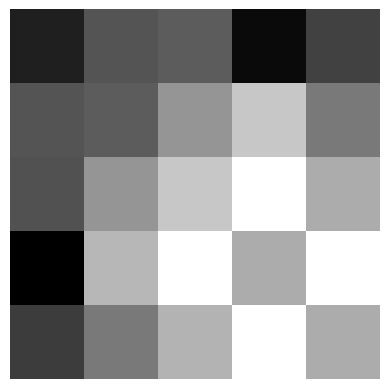

In [18]:
# Displaying values for optimal policy
values = algo.values
walk.display_values(values)

In [19]:
# Gains of optimal policy
agent = Agent(walk, policy=optimal_policy)
gamma = 0.9
gains = agent.get_gains(gamma=gamma)
print("Expected gain of optimal policy:", np.mean(gains))

Expected gain of optimal policy: 8.983723530717834


### Interpretation of results

The new policy heads towards the points where reward is positive and the greater, especially (3, 3) where reward is 3.

In addition, the values around these points are greater than elsewhere, because being at these points mean a great chance of hitting (3, 3) at next step.

Expected gains are going from ~1 with a random policy, to ~10 with the optimal policy.

### Now with increased winds:

In [20]:
# New wind
wind_ = {(0, 1): 0.8, (1, 0): 0.1}

Walk.set_parameters(Walk.Size, Walk.Rewards, wind_)

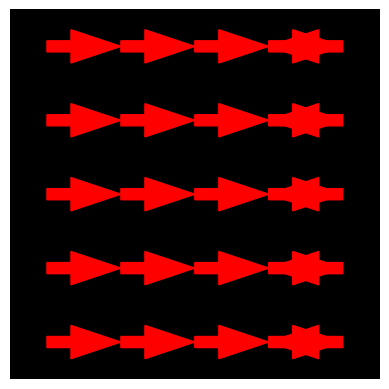

In [21]:
# Displaying random policy
agent = Agent(walk)
walk.display_policy(agent.policy)

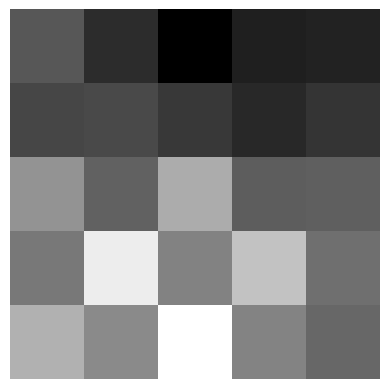

In [22]:
# Displaying values for random policy
algo = PolicyEvaluation(walk, agent.policy)
algo.evaluate_policy()
values = algo.values
walk.display_values(values)

In [23]:
# Gains of random policy
gamma = 0.9
gains = agent.get_gains(gamma=gamma)
print("Expected gain of random policy:", np.mean(gains))

Expected gain of random policy: 0.5039276073108527


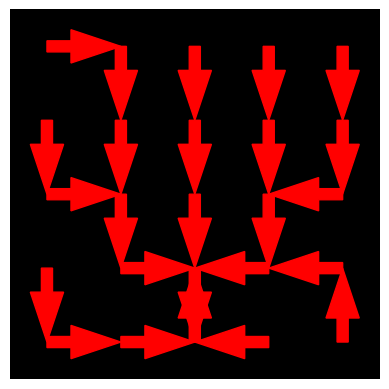

In [24]:
# Displaying optimal policy
algo = PolicyIteration(walk)
optimal_policy = algo.get_optimal_policy()
walk.display_policy(optimal_policy)

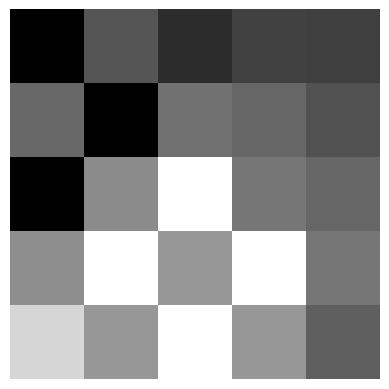

In [25]:
# Displaying values for optimal policy
values = algo.values
walk.display_values(values)

In [26]:
# Gains of optimal policy
agent = Agent(walk, policy=optimal_policy)
gamma = 0.9
gains = agent.get_gains(gamma=gamma)
print("Expected gain of optimal policy:", np.mean(gains))

Expected gain of optimal policy: 8.28194223928331


### Observation on increased winds

We observe the same with increased winds, with a increase in gains from ~0.9 to ~14
However we can note that the displayed value didn't change so much, compared to the previous one, because the winds have a greater importance in the agent movements, meaning the user's action is less powerful.

## Value Iteration

Value iteration relies on Bellman's optimality equation. 

## To do

Check the code of ``ValueIteration`` below.
* Complete the method ``get_optimal_policy``.
* Test it on the maze and the walk.
* You play TicTacToe at random against an adversary using the one-step policy. What is your expected gain? 
* Observe the improvement when you play perfectly against the same adversary.
* Do the same with Nim.

In [27]:
class ValueIteration(PolicyEvaluation):
    """Value iteration. 
    
    Parameters
    ----------
    model: object of class Environment
        The model.
    player: int
        Player for games (1 or -1, default = default player of the game).        
    gamma: float
        Discount factor (between 0 and 1).
    n_iter: int
        Maximum number of value iterations.
    """
    
    def __init__(self, model, player=None, gamma=1, n_iter=100):
        agent = Agent(model, player=player)
        policy = agent.policy
        player = agent.player
        super(ValueIteration, self).__init__(model, policy, player, gamma)  
        self.n_iter = n_iter
        
    def get_optimal_policy(self):
        """Get the optimal policy by iteration of Bellman's optimality equation."""
        transitions = self.transitions
        # Bellman's optimality equation
        values = np.zeros(self.n_states)
        for t in range(self.n_iter):
            next_values = self.rewards + self.gamma*values
            action_value = {action: transition.dot(next_values) for action, transition in transitions.items()}
            values = np.zeros(self.n_states)
            for i, state in enumerate(self.states):
                if not self.model.is_terminal(state):
                    actions = self.get_actions(state)
                    values[i] = np.max([action_value[action][i] for action in actions])
        self.values = values
        policy = self.get_policy()
        return policy

### Test on maze

In [28]:
maze = Maze()
algo = ValueIteration(maze, gamma=0.9)

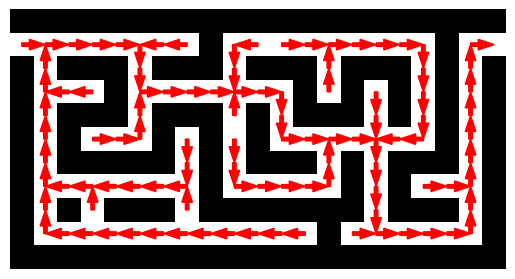

In [29]:
policy = algo.get_optimal_policy()
maze.display_policy(policy)

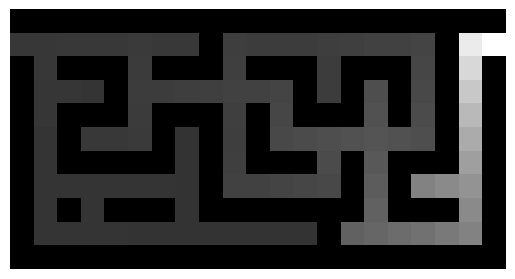

In [30]:
values = algo.values
maze.display_values(values)

### Test on walk

In [31]:
wind = {(0, 1): 0.1, (1, 0): 0.2}
Walk.set_parameters(Walk.Size, Walk.Rewards, wind)

walk = Walk()
algo = ValueIteration(walk, gamma=0.9)

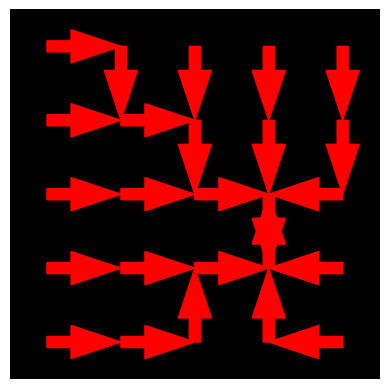

In [32]:
policy = algo.get_optimal_policy()
walk.display_policy(policy)

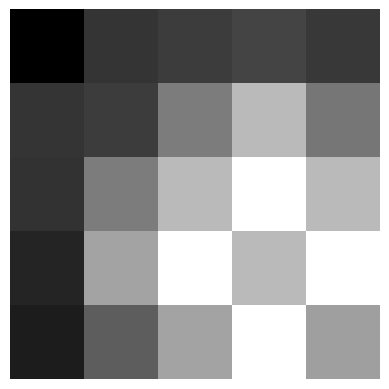

In [33]:
values = algo.values
walk.display_values(values)

### TicTacToe: random vs. one-step

In [34]:
Game = TicTacToe
game = Game(adversary_policy="one_step")
agent = Agent(game, policy="random")

print("Expected gains for a random player against a one-step is:", np.mean(agent.get_gains()))

Expected gains for a random player against a one-step is: -0.7


## Perfect players

We now use Value Iteration to get perfect players, assuming the best response of the adversary.

## To do

Check the code of the new class ``ValueIteration`` below.
* Complete the method ``get_perfect_players``.
* Test it on TicTacToe. Who wins?
* Test it on Nim. Who wins?
* Is this approach applicable to ConnectFour? Why?

In [35]:
from scipy import sparse

In [36]:
class ValueIteration(PolicyEvaluation):
    """Value iteration. 
    
    Parameters
    ----------
    model: object of class Environment
        The model.
    player: int
        Player for games (1 or -1, default = default player of the game).        
    gamma: float
        Discount factor (between 0 and 1).
    n_iter: int
        Maximum number of value iterations.
    """
    
    def __init__(self, model, player=None, gamma=1, n_iter=100):
        agent = Agent(model, player=player)
        policy = agent.policy
        player = agent.player
        super(ValueIteration, self).__init__(model, policy, player, gamma)  
        self.n_iter = n_iter
    
    def get_perfect_players(self):
        """Get perfect players for games, with the best response of the adversary."""
        if not self.model.is_game():
            raise ValueError("This method applies to games only.")
        # get transitions for each player
        actions = self.model.get_all_actions()
        transitions = {action: sparse.lil_matrix((self.n_states, self.n_states)) for action in actions}
        for i, state in enumerate(self.states):    
            actions = self.model.get_available_actions(state)
            for action in actions:
                next_state = self.model.get_next_state(state, action)
                j = self.get_state_id(next_state)
                transitions[action][i, j] = 1
        transitions = {action: sparse.csr_matrix(transition) for action, transition in transitions.items()}
        self.transitions = transitions
        # Bellman's optimality equation
        values = np.zeros(self.n_states)

        for t in range(self.n_iter):
            next_values = self.rewards + self.gamma * values
            action_value = {action: transition.dot(next_values) for action, transition in self.transitions.items()}
            values = np.zeros(self.n_states)
            for i, state in enumerate(self.states):
                if not self.model.is_terminal(state):
                    actions = self.model.get_available_actions(state)
                    if state[0]==self.player: 
                        values[i] = np.max([action_value[action][i] for action in actions])  
                    else:
                        values[i] = np.min([action_value[action][i] for action in actions])
        self.values = values
        # policies
        policy = self.get_policy(self.player)
        adversary_policy = self.get_policy(-self.player)
        return policy, adversary_policy
        

### TicTacToe

In [37]:
algo = ValueIteration(TicTacToe(), player=1, gamma=0.9)
policy, adversary_policy = algo.get_perfect_players()

In [38]:
Game = TicTacToe
game = Game(adversary_policy="one_step")
agent = Agent(game, policy=policy)

print("Expected gains for a perfect player against a one-step player:", np.mean(agent.get_gains()))

Expected gains for a perfect player against a one-step player: 0.71


In [39]:
Game = TicTacToe
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)

print("Expected gains for a perfect player against another perfect player:", np.mean(agent.get_gains()))

Expected gains for a perfect player against another perfect player: 0.0


For TicTacToe, even a perfect player is not sure to win against a "not perfect" player, because draws often happen in that game, and the different moves are limited.

However, when 2 perfect players play, they will always draw.

### Nim

In [40]:
algo = ValueIteration(Nim(), gamma=0.9)
policy, adversary_policy = algo.get_perfect_players()

In [41]:
Game = Nim
game = Game(adversary_policy="one_step")
agent = Agent(game, policy=policy)

print("Expected gains for a perfect player against a one-step player:", np.mean(agent.get_gains()))

Expected gains for a perfect player against a one-step player: 1.0


In [42]:
Game = Nim
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)

print("Expected gains for a perfect player against another perfect player:", np.mean(agent.get_gains()))

Expected gains for a perfect player against another perfect player: -1.0


For Nim, being a perfect player makes you sure to win against everybody who is not a "perfect player".

However, when two perfect players are playing together, the second one to play will always win.

### ConnectFour

It is not applicable to ConnectFour because the state space is far too large, with 42 boards, with 3 possibilities for each, totalling $3^{42}$ states.